Yixuan Lu

z5577113

COMP9414 Assignment 2


My assignment is divided into three main sections. 

The first section involves the definition of the Q-learning and SARSA methods. I have two versions of the SARSA method, named SARSA and SARSA_v2. SARSA_v2 is the final version. 

The second section is to determine hyperparameters. I plot graphs and calculate the average steps. During this phase, I identified potential issues with the initial version of the SARSA method. Thus came out second version of SARSA.

The final section including training with the final parameters, saving the Q-values locally, and running the required tests. 

The code from the second section does not need to be run during the testing phase.

____________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________

Qlearning is an off-policy algorithm. It updates q values using max possible q value in next stage. But SARSA is an on-policy algorithm. It updates q values using the action taken on next stage and updates policy base on current policy.


The discount factor determines how much importance is placed on future rewards. In the Taxi problem, it's more appropriate to focus on long-term rewards, so a higher gamma value should be chosen. After I test it, I choose 0.9.

Small alpha has less fluctuations. So, I choose 0.1.

In order to satisfy the expected accumulated reward and avg steps, I set high number of episodes.

need to upgrade gym if:"
env = gym.make("Taxi-v3")
reset_output = env.reset()
print(reset_output)" does not print dictionary

In [ ]:
#!pip install --upgrade gym

In [99]:
# simple test
# test some parameters used in assignment
import gym
import numpy as np
env = gym.make("Taxi-v3", render_mode="ansi")
state = env.reset()
print(env.render())
print(env.action_space)
print(env.action_space.n)
print(np.random.randint(0,env.action_space.n))
print(np.random.rand())
# n_state, reward, done, truncated, info = env.step(action)
# https://stackoverflow.com/questions/76644713/openai-gym-too-many-variables-to-unpack
action = np.random.randint(0,env.action_space.n)
a, b, c, d, e = env.step(action)
print(a, b, c, d, e)
print(e.get('action_mask'))
env = gym.make("Taxi-v3")
reset_output = env.reset()
print(reset_output)
print(np.random.rand())
print(np.random.rand())

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Discrete(6)
6
2
0.27846575944702356
98 -1 False False {'prob': 1.0, 'action_mask': array([1, 0, 0, 1, 0, 1], dtype=int8)}
[1 0 0 1 0 1]
(168, {'prob': 1.0, 'action_mask': array([1, 1, 1, 1, 0, 0], dtype=int8)})
0.18574345191592934
0.0776422157986637


In [169]:
# define qlearning function, support different parameters as input
# learning from https://www.geeksforgeeks.org/q-learning-in-python/

import numpy as np
import gym
import matplotlib.pyplot as plt
import random

# Q(s, a) ← Q(s, a) + α * (R + γ * max(Q(s', a')) - Q(s, a))
# 1-ε chance for exploitation: choose max(Q(s', a')) and ε chance for exploration: random select one
def q_learning(l_rate_alpha, d_factor_gamma, e_prob_epsilon, num_episodes, max_steps=100, d_rate = 0.005, min_epsilon=0.1):
    max_steps_per_episode=max_steps
    #decay_rate = d_rate
    env = gym.make("Taxi-v3", render_mode="ansi")
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    rewards = []
    steps = []
    learning_rate = l_rate_alpha
    discount_factor = d_factor_gamma
    exploration_prob = e_prob_epsilon
    episodes = int(num_episodes)
    for episode in range(episodes):
        current_state = env.reset()[0]
        total_reward = 0
        step_count = 0
        # while step_count < max_steps_per_episode:
        while True:
            if np.random.rand() < exploration_prob:
            # if random.uniform(0,1) < exploration_prob:
                action = np.random.randint(0,env.action_space.n)  # exploration
                # action = env.action_space.sample()  # exploration
            else:
                action = np.argmax(q_table[current_state,:])  # exploitation
            next_state, reward, done, _, info = env.step(action)
            # print(f"Step: {step_count}, Info: {info}")
#             Your agent should be penalized -1 per step it takes, receive a +20 reward for delivering the passenger, and incur a -10
# penalty for executing “pickup” and “drop-off” actions illegally
            # reward = -1 # your agent should be penalized -1 per step it takes
            # if action == 4 and info['action_mask'][action] == 0:  # illegally pickup Passenger
            #     reward -= 10
            # elif action == 5 and info['action_mask'][action] == 0:  # illegally Drop off Passenger
            #     reward -= 10
            # elif action == 5 and info['action_mask'][action] == 1:  #  delivering the passenger
            #     reward += 20
            total_reward += reward
            q_table[current_state, action] += learning_rate * (reward + discount_factor * np.max(q_table[next_state]) - q_table[current_state, action])
            current_state = next_state
            step_count += 1
            if done:
                break
        #exploration_prob = max(min_epsilon, np.exp(-decay_rate*exploration_prob))
        rewards.append(total_reward)
        steps.append(step_count)
    return q_table, rewards, steps
    
def SARSA(l_rate_alpha, d_factor_gamma, e_prob_epsilon, num_episodes, max_steps=2000):
    env = gym.make("Taxi-v3", render_mode="ansi")
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    rewards = []
    steps = []
    learning_rate = l_rate_alpha
    discount_factor = d_factor_gamma
    exploration_prob = e_prob_epsilon
    episodes = int(num_episodes)
    for episode in range(episodes):
        current_state = env.reset()[0]
        total_reward = 0
        step_count = 0
        action = 0
        if np.random.rand() < exploration_prob:
        # if random.uniform(0,1) < exploration_prob:
            # action = np.random.randint(0,env.action_space.n)  # exploration
            action = env.action_space.sample()  # exploration
        else:
            action = np.argmax(q_table[current_state,:])  # exploitation
        while step_count<max_steps:
            next_state, reward, done, _, info = env.step(action)
            # print(f"Step: {step_count}, Info: {info}")
            # difference between qlearning here, predict next action
            if np.random.rand() < exploration_prob:
                next_action = env.action_space.sample()  # exploration
            else:
                next_action = np.argmax(q_table[next_state])  # exploitation

            q_table[current_state, action] += learning_rate * (reward + discount_factor * q_table[next_state, next_action] - q_table[current_state, action])
            current_state = next_state
            action = next_action
            total_reward += reward
            step_count += 1
            if done:
                break
        #exploration_prob = max(min_epsilon, np.exp(-decay_rate*exploration_prob))
        rewards.append(total_reward)
        steps.append(step_count)
    return q_table, rewards, steps
    
def SARSA_v2(l_rate_alpha, d_factor_gamma, e_prob_epsilon, num_episodes, max_steps=2000, d_rate=0.005, min_epsilon=0.005):
    env = gym.make("Taxi-v3", render_mode="ansi")
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    rewards = []
    steps = []
    learning_rate = l_rate_alpha
    discount_factor = d_factor_gamma
    exploration_prob = e_prob_epsilon
    episodes = int(num_episodes)
    for episode in range(episodes):
        current_state = env.reset()[0]
        total_reward = 0
        step_count = 0
        action = 0
        if np.random.rand() < exploration_prob:
        # if random.uniform(0,1) < exploration_prob:
            # action = np.random.randint(0,env.action_space.n)  # exploration
            action = env.action_space.sample()  # exploration
        else:
            action = np.argmax(q_table[current_state,:])  # exploitation
        # while step_count<max_steps:
        while True:
            next_state, reward, done, _, info = env.step(action)
            # print(f"Step: {step_count}, Info: {info}")
            # difference between qlearning here, predict next action
            if np.random.rand() < exploration_prob:
                next_action = env.action_space.sample()  # exploration
            else:
                next_action = np.argmax(q_table[next_state])  # exploitation

            q_table[current_state, action] += learning_rate * (reward + discount_factor * q_table[next_state, next_action] - q_table[current_state, action])
            current_state = next_state
            action = next_action
            total_reward += reward
            step_count += 1
            if done:
                break
        exploration_prob = max(exploration_prob * np.exp(-d_rate * episode),min_epsilon)
        rewards.append(total_reward)
        steps.append(step_count)
    return q_table, rewards, steps

q_learning looks good. I will try different parameters later.

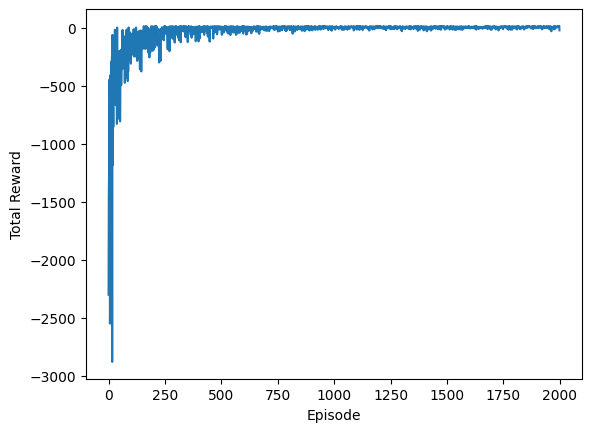

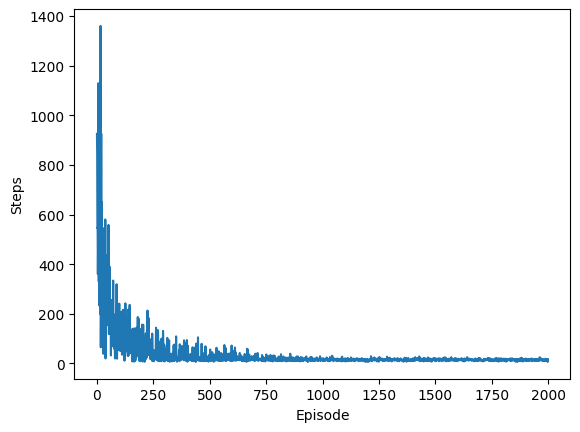

In [184]:
learning_rate = 0.2
discount_factor = 0.9
exploration_prob = 0.1
num_episodes = 2000

_, rewards_q_learning, steps_q_learning = q_learning(learning_rate, discount_factor, exploration_prob, num_episodes)

plt.plot(rewards_q_learning)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

plt.plot(steps_q_learning)
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.show()

I observed some significant fluctuations in the SARSA. I determined that these fluctuations were caused by exploration actions during the convergence to stability. Therefore, I decided to decrease the epsilon value as the number of episodes increases in order to reduce the impact of exploration. In SARSA_v2, I implement the feature and make a comparison between two approaches.

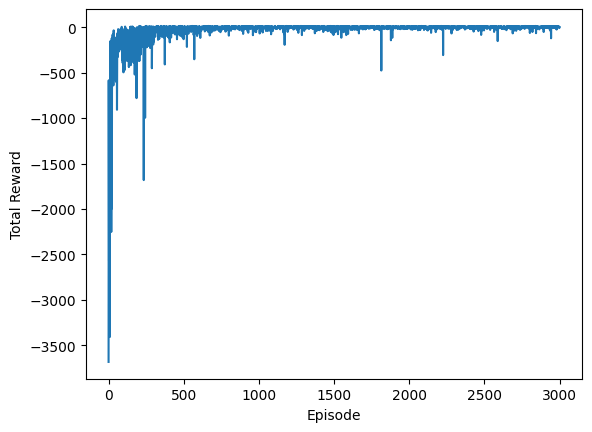

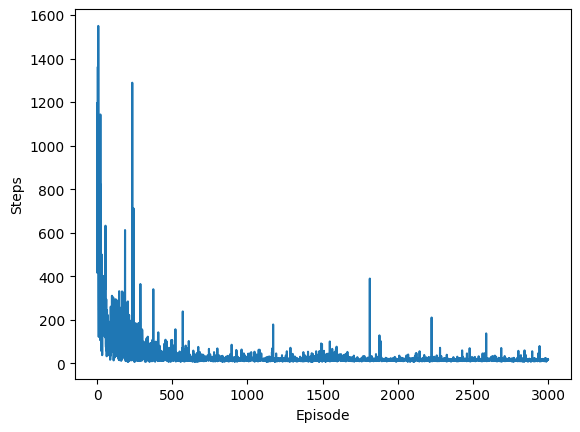

In [185]:
learning_rate = 0.2
discount_factor = 0.9
exploration_prob = 0.1
num_episodes = 3000

q_table_sarsa, rewards_sarsa, steps_sarsa = SARSA(learning_rate, discount_factor, exploration_prob, num_episodes)

plt.plot(rewards_sarsa)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

plt.plot(steps_sarsa)
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.show()

v2 is much better than origin

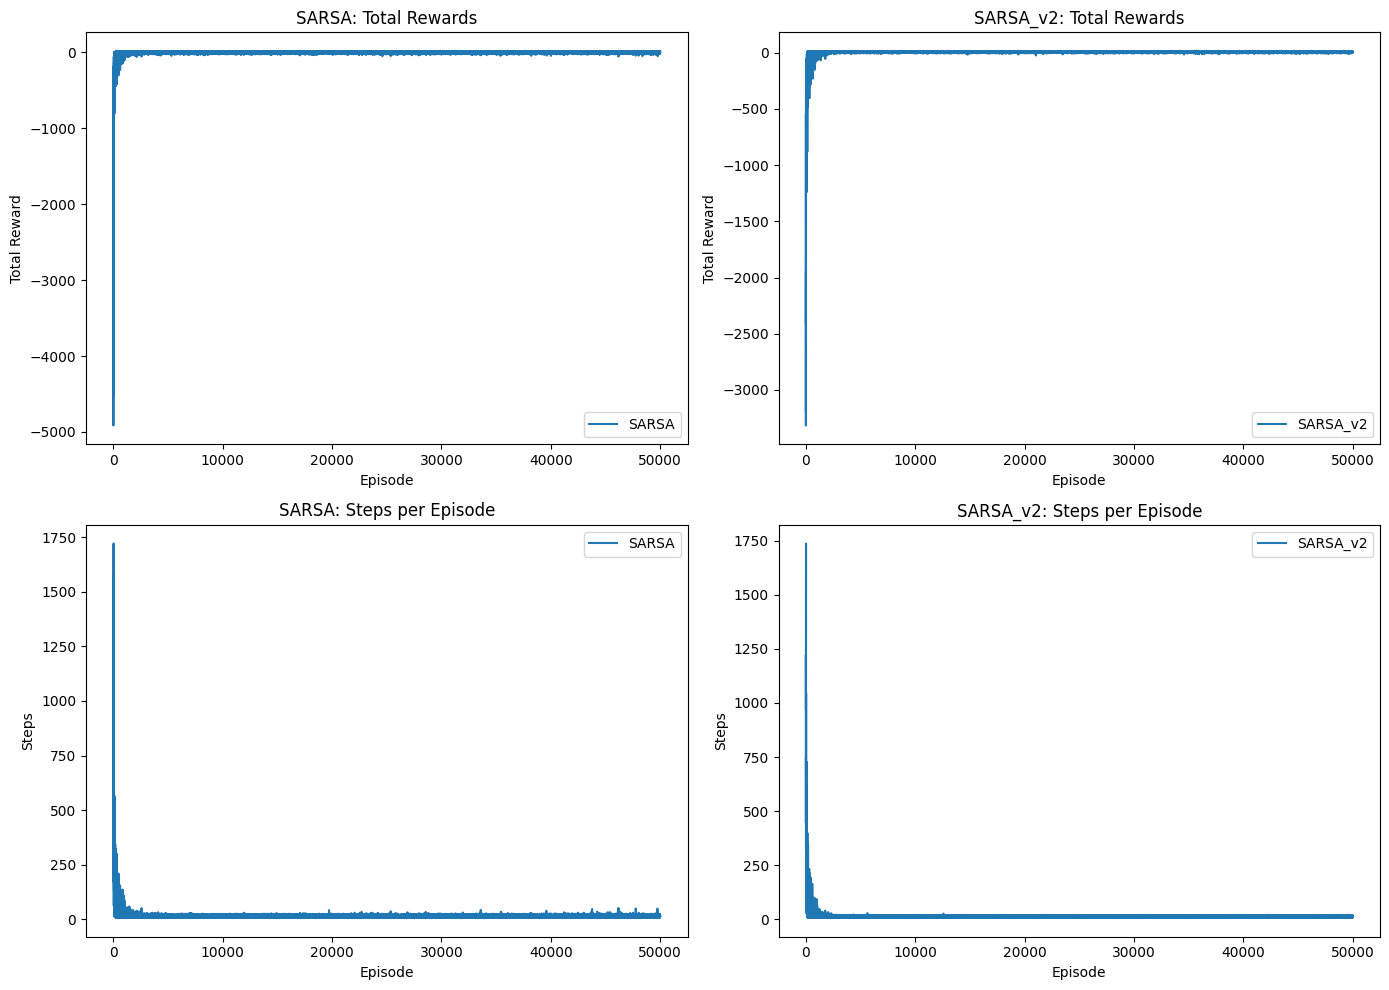

In [196]:
import matplotlib.pyplot as plt
learning_rate = 0.1
discount_factor = 0.95
exploration_prob = 0.1
num_episodes = 50000

_,sarsa_rewards, sarsa_steps = SARSA(learning_rate, discount_factor, exploration_prob, num_episodes)
_,sarsa_v2_rewards, sarsa_v2_steps = SARSA_v2(learning_rate, discount_factor, exploration_prob, num_episodes)

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

ax[0, 0].plot(sarsa_rewards, label='SARSA')
ax[0, 0].set_title('SARSA: Total Rewards')
ax[0, 0].set_xlabel('Episode')
ax[0, 0].set_ylabel('Total Reward')
ax[0, 0].legend()

ax[0, 1].plot(sarsa_v2_rewards, label='SARSA_v2')
ax[0, 1].set_title('SARSA_v2: Total Rewards')
ax[0, 1].set_xlabel('Episode')
ax[0, 1].set_ylabel('Total Reward')
ax[0, 1].legend()

ax[1, 0].plot(sarsa_steps, label='SARSA')
ax[1, 0].set_title('SARSA: Steps per Episode')
ax[1, 0].set_xlabel('Episode')
ax[1, 0].set_ylabel('Steps')
ax[1, 0].legend()

ax[1, 1].plot(sarsa_v2_steps, label='SARSA_v2')
ax[1, 1].set_title('SARSA_v2: Steps per Episode')
ax[1, 1].set_xlabel('Episode')
ax[1, 1].set_ylabel('Steps')
ax[1, 1].legend()

plt.tight_layout()
plt.show()

In [187]:
learning_rates = [0.2, 0.4, 0.6, 0.8]
discount_factor = 0.9
exploration_prob = 0.1
num_episodes = 2000

q_learning_results = {}
sarsa_results = {}

for lr in learning_rates:
    q_table_q_learning, rewards_q_learning, steps_q_learning = q_learning(lr, discount_factor, exploration_prob, num_episodes)
    q_learning_results[lr] = (rewards_q_learning, steps_q_learning)

    q_table_sarsa, rewards_sarsa, steps_sarsa = SARSA_v2(lr, discount_factor, exploration_prob, num_episodes)
    sarsa_results[lr] = (rewards_sarsa, steps_sarsa)


by observing the following graph, large learning rate have significant fluctuations

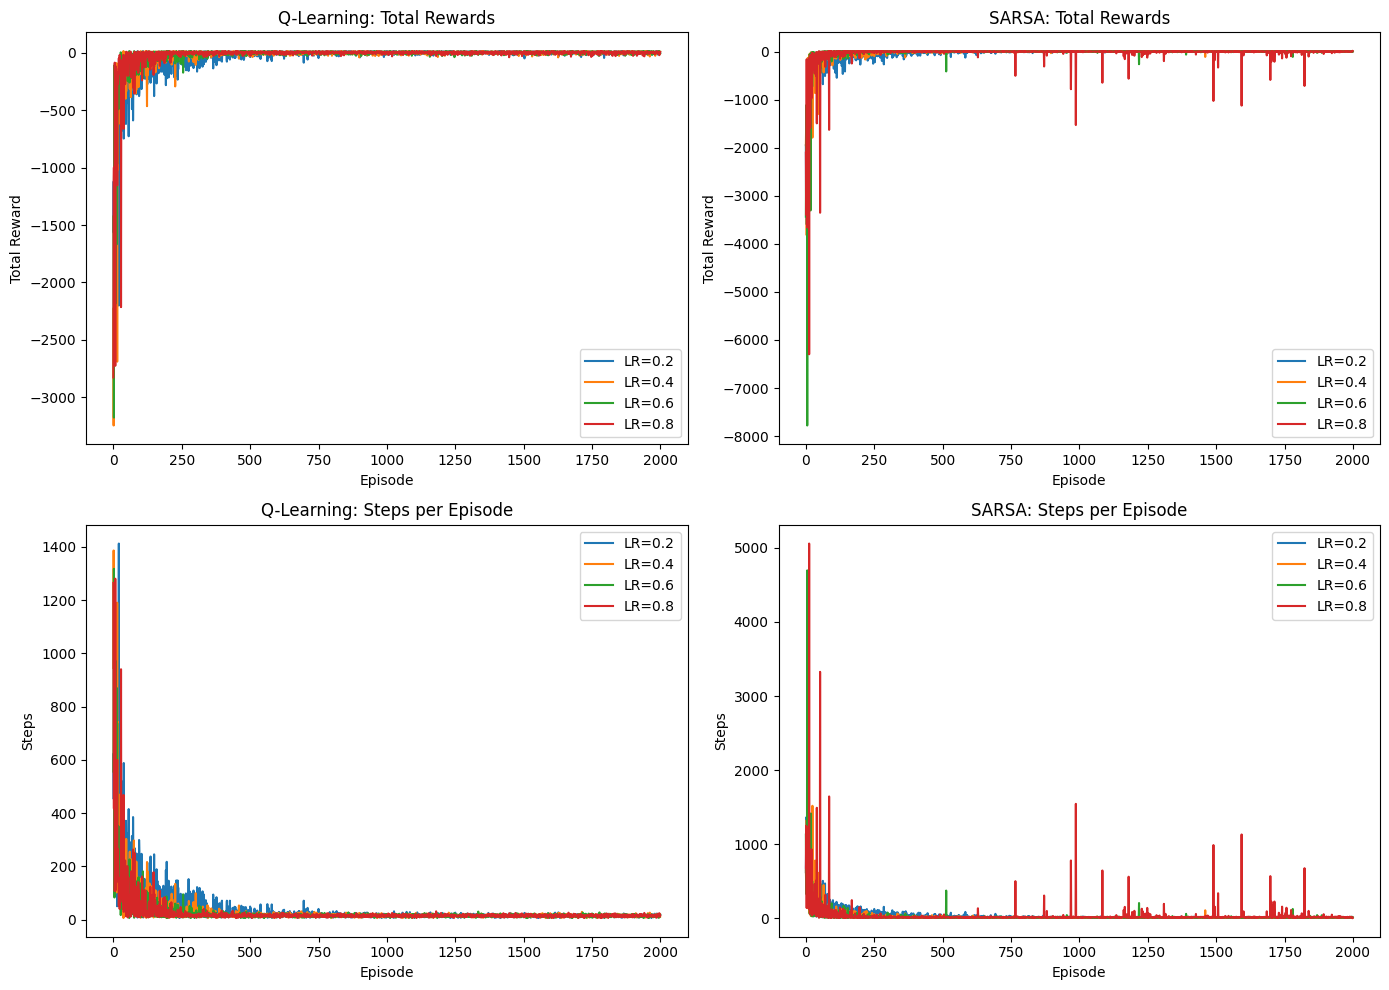

In [188]:
# Plotting results
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

for i, lr in enumerate(learning_rates):
    ax[0, 0].plot(q_learning_results[lr][0], label=f'LR={lr}')
    ax[0, 0].set_title('Q-Learning: Total Rewards')
    ax[0, 0].set_xlabel('Episode')
    ax[0, 0].set_ylabel('Total Reward')

    ax[0, 1].plot(sarsa_results[lr][0], label=f'LR={lr}')
    ax[0, 1].set_title('SARSA: Total Rewards')
    ax[0, 1].set_xlabel('Episode')
    ax[0, 1].set_ylabel('Total Reward')

    ax[1, 0].plot(q_learning_results[lr][1], label=f'LR={lr}')
    ax[1, 0].set_title('Q-Learning: Steps per Episode')
    ax[1, 0].set_xlabel('Episode')
    ax[1, 0].set_ylabel('Steps')

    ax[1, 1].plot(sarsa_results[lr][1], label=f'LR={lr}')
    ax[1, 1].set_title('SARSA: Steps per Episode')
    ax[1, 1].set_xlabel('Episode')
    ax[1, 1].set_ylabel('Steps')

for axes in ax.flat:
    axes.legend()

plt.tight_layout()
plt.show()

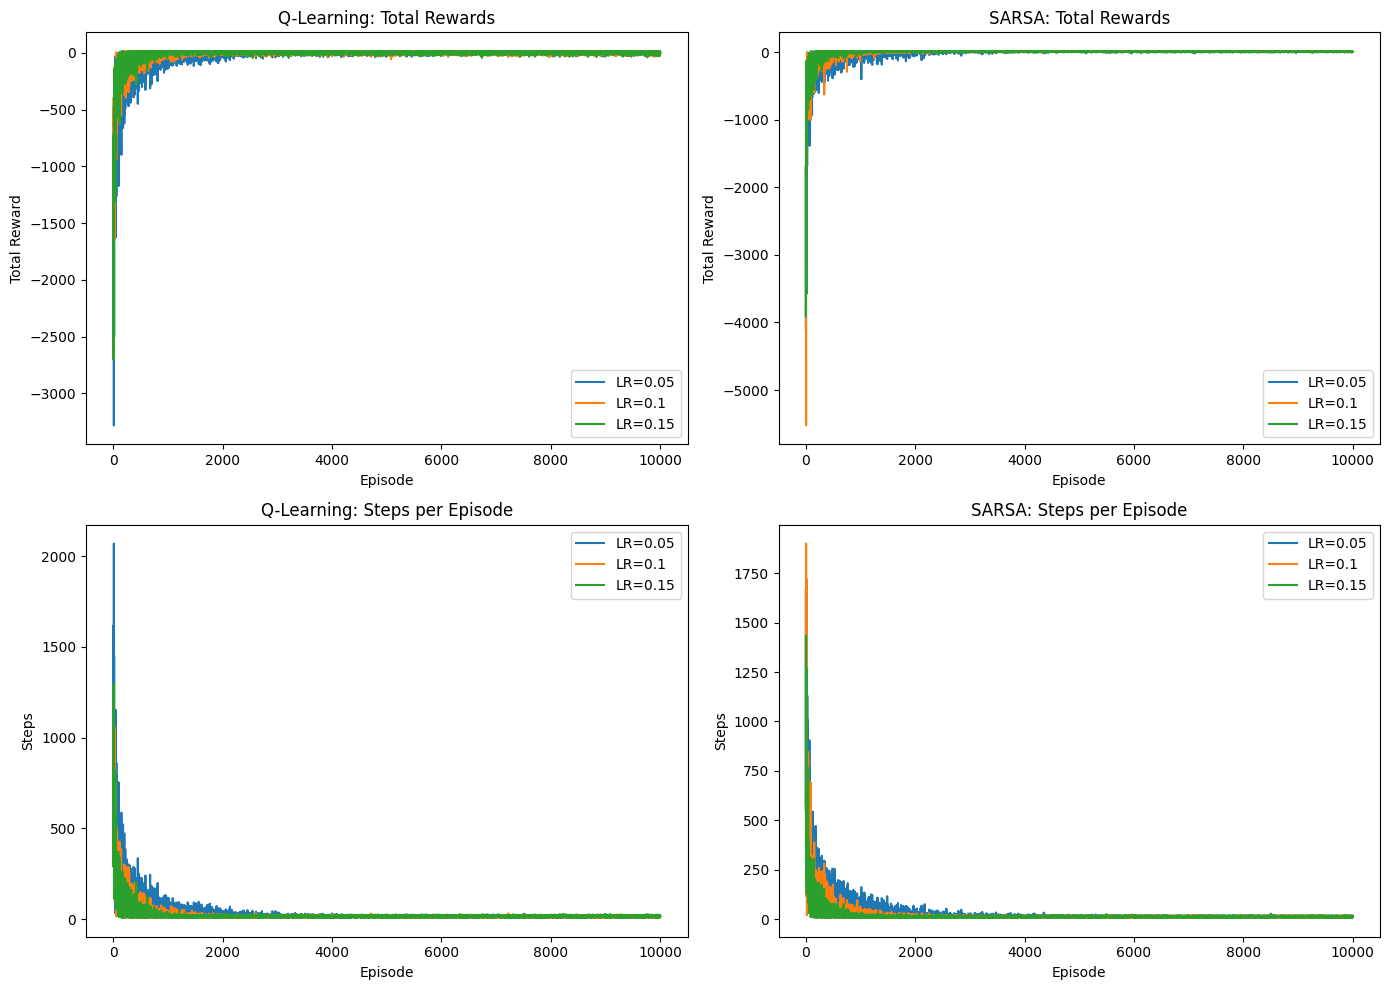

In [195]:
learning_rates = [0.05,0.1,0.15]
discount_factor = 0.9
exploration_prob = 0.1
num_episodes = 10000

q_learning_results = {}
sarsa_results = {}

for lr in learning_rates:
    q_table_q_learning, rewards_q_learning, steps_q_learning = q_learning(lr, discount_factor, exploration_prob, num_episodes)
    q_learning_results[lr] = (rewards_q_learning, steps_q_learning)

    q_table_sarsa, rewards_sarsa, steps_sarsa = SARSA_v2(lr, discount_factor, exploration_prob, num_episodes)
    sarsa_results[lr] = (rewards_sarsa, steps_sarsa)

# Plotting results
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

for i, lr in enumerate(learning_rates):
    ax[0, 0].plot(q_learning_results[lr][0], label=f'LR={lr}')
    ax[0, 0].set_title('Q-Learning: Total Rewards')
    ax[0, 0].set_xlabel('Episode')
    ax[0, 0].set_ylabel('Total Reward')

    ax[0, 1].plot(sarsa_results[lr][0], label=f'LR={lr}')
    ax[0, 1].set_title('SARSA: Total Rewards')
    ax[0, 1].set_xlabel('Episode')
    ax[0, 1].set_ylabel('Total Reward')

    ax[1, 0].plot(q_learning_results[lr][1], label=f'LR={lr}')
    ax[1, 0].set_title('Q-Learning: Steps per Episode')
    ax[1, 0].set_xlabel('Episode')
    ax[1, 0].set_ylabel('Steps')

    ax[1, 1].plot(sarsa_results[lr][1], label=f'LR={lr}')
    ax[1, 1].set_title('SARSA: Steps per Episode')
    ax[1, 1].set_xlabel('Episode')
    ax[1, 1].set_ylabel('Steps')

for axes in ax.flat:
    axes.legend()

plt.tight_layout()
plt.show()

sarsa has very poor performance when df = 0.6, 0.7

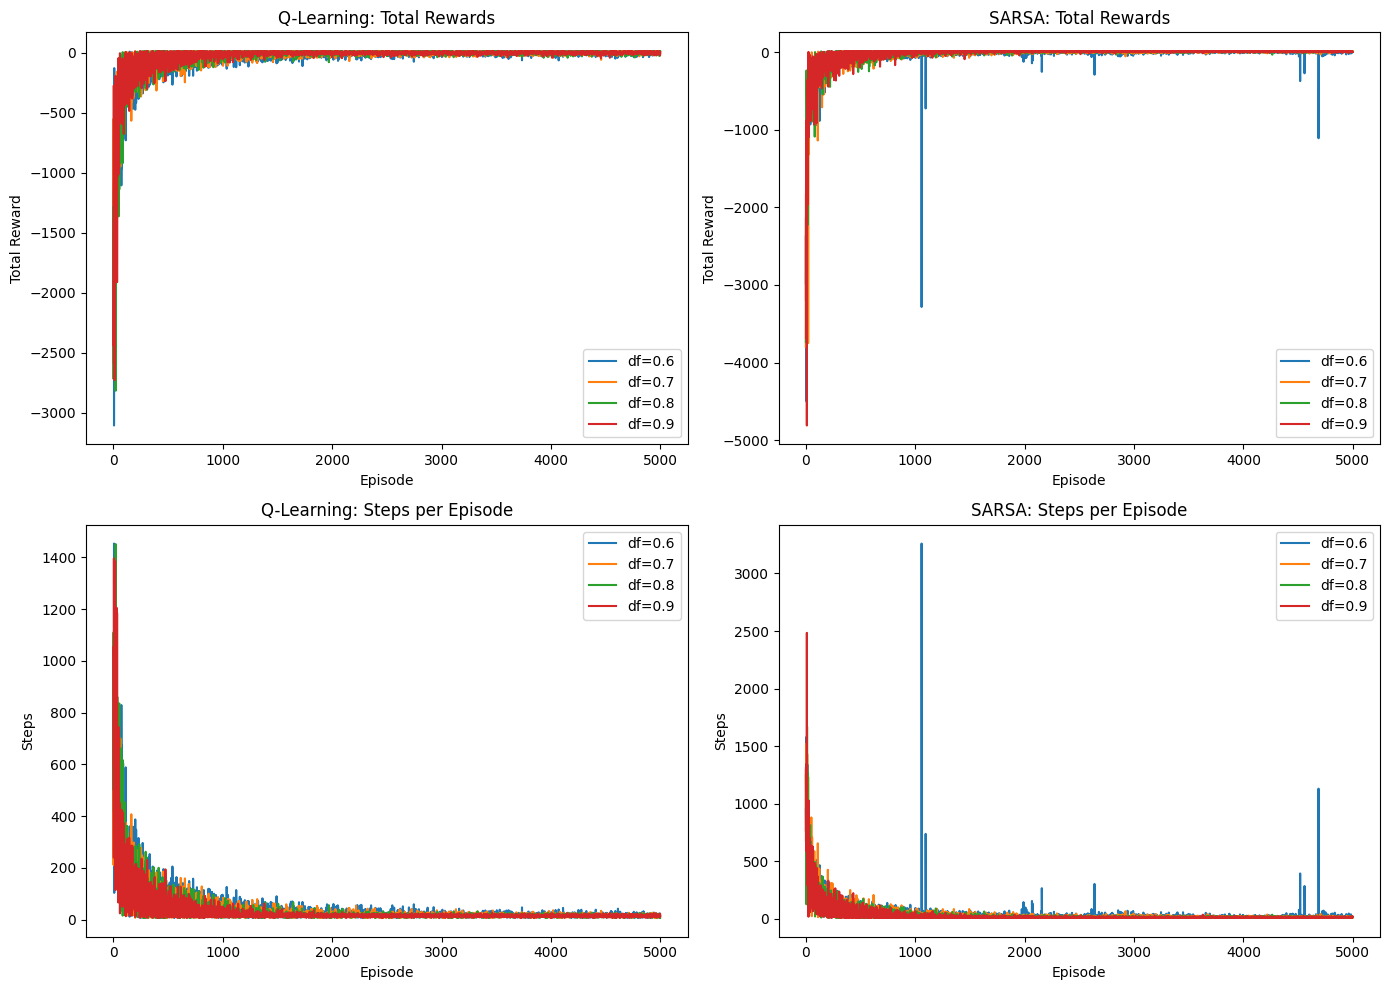

In [198]:
learning_rate = 0.1
discount_factors = [0.6,0.7,0.8,0.9]
exploration_prob = 0.1
num_episodes = 5000

q_learning_results = {}
sarsa_results = {}

for df in discount_factors:
    q_table_q_learning, rewards_q_learning, steps_q_learning = q_learning(learning_rate, df, exploration_prob, num_episodes)
    q_learning_results[df] = (rewards_q_learning, steps_q_learning)

    q_table_sarsa, rewards_sarsa, steps_sarsa = SARSA_v2(learning_rate, df, exploration_prob, num_episodes)
    sarsa_results[df] = (rewards_sarsa, steps_sarsa)

# Plotting results
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

for df in discount_factors:
    ax[0, 0].plot(q_learning_results[df][0], label=f'df={df}')
    ax[0, 0].set_title('Q-Learning: Total Rewards')
    ax[0, 0].set_xlabel('Episode')
    ax[0, 0].set_ylabel('Total Reward')

    ax[0, 1].plot(sarsa_results[df][0], label=f'df={df}')
    ax[0, 1].set_title('SARSA: Total Rewards')
    ax[0, 1].set_xlabel('Episode')
    ax[0, 1].set_ylabel('Total Reward')

    ax[1, 0].plot(q_learning_results[df][1], label=f'df={df}')
    ax[1, 0].set_title('Q-Learning: Steps per Episode')
    ax[1, 0].set_xlabel('Episode')
    ax[1, 0].set_ylabel('Steps')

    ax[1, 1].plot(sarsa_results[df][1], label=f'df={df}')
    ax[1, 1].set_title('SARSA: Steps per Episode')
    ax[1, 1].set_xlabel('Episode')
    ax[1, 1].set_ylabel('Steps')

for axes in ax.flat:
    axes.legend()

plt.tight_layout()
plt.show()

There is no significant difference between different exploration_probs values. 0.2 has more fluctuations. So, I keep 0.1.

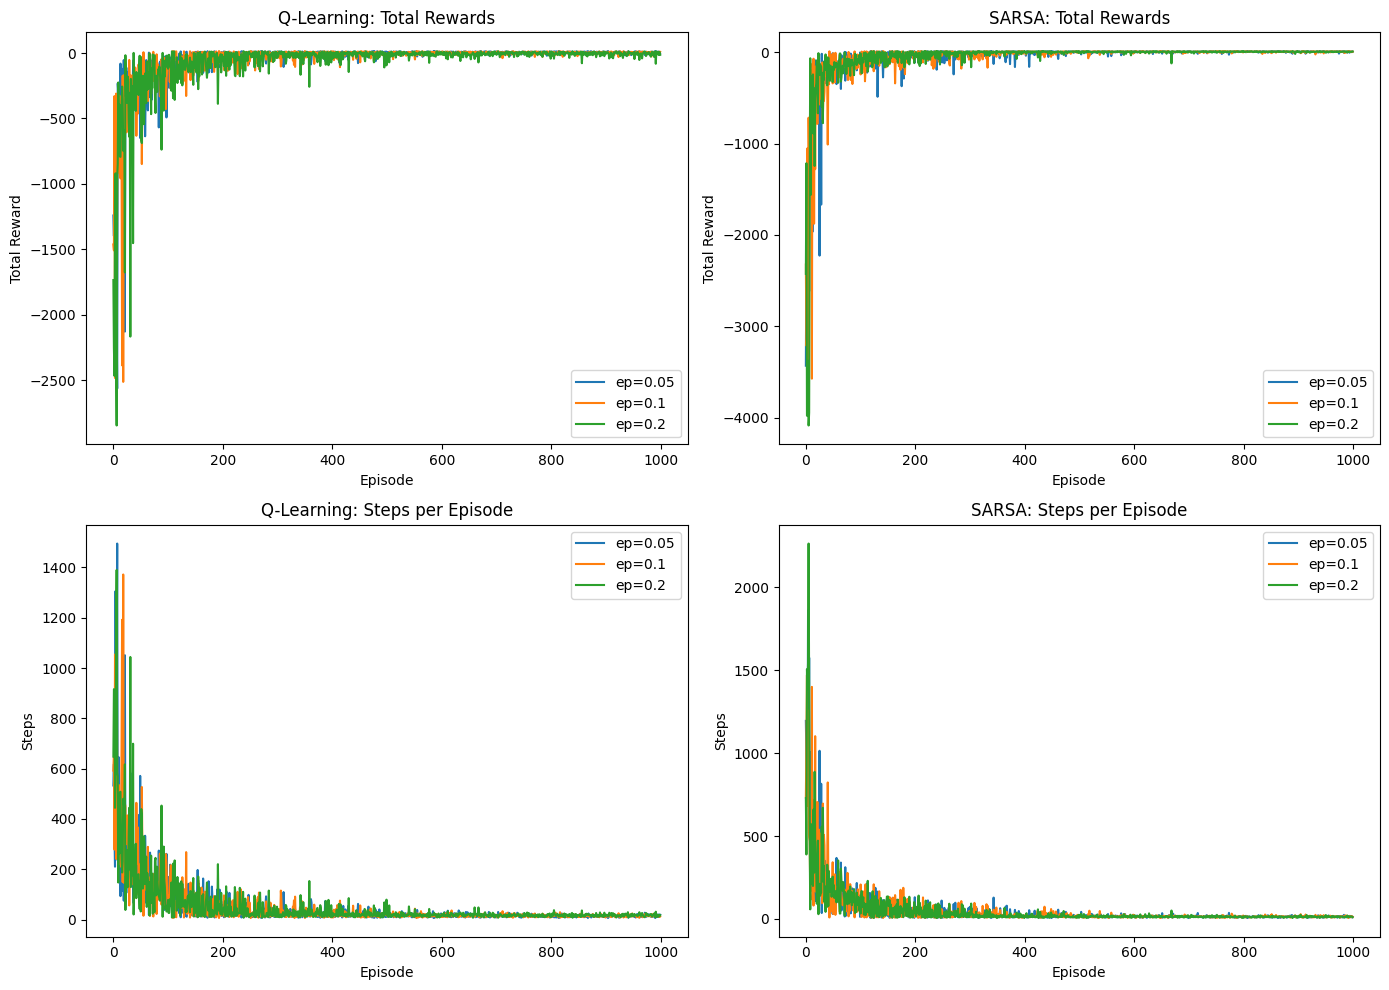

In [191]:
learning_rate = 0.1
discount_factor = 0.9
exploration_probs = [0.05, 0.1, 0.2]
num_episodes = 1000

q_learning_results = {}
sarsa_results = {}

for ep in exploration_probs:
    q_table_q_learning, rewards_q_learning, steps_q_learning = q_learning(learning_rate, discount_factor, ep, num_episodes)
    q_learning_results[ep] = (rewards_q_learning, steps_q_learning)

    q_table_sarsa, rewards_sarsa, steps_sarsa = SARSA_v2(learning_rate, discount_factor, ep, num_episodes)
    sarsa_results[ep] = (rewards_sarsa, steps_sarsa)

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

for ep in exploration_probs:
    ax[0, 0].plot(q_learning_results[ep][0], label=f'ep={ep}')
    ax[0, 0].set_title('Q-Learning: Total Rewards')
    ax[0, 0].set_xlabel('Episode')
    ax[0, 0].set_ylabel('Total Reward')

    ax[0, 1].plot(sarsa_results[ep][0], label=f'ep={ep}')
    ax[0, 1].set_title('SARSA: Total Rewards')
    ax[0, 1].set_xlabel('Episode')
    ax[0, 1].set_ylabel('Total Reward')

    ax[1, 0].plot(q_learning_results[ep][1], label=f'ep={ep}')
    ax[1, 0].set_title('Q-Learning: Steps per Episode')
    ax[1, 0].set_xlabel('Episode')
    ax[1, 0].set_ylabel('Steps')

    ax[1, 1].plot(sarsa_results[ep][1], label=f'ep={ep}')
    ax[1, 1].set_title('SARSA: Steps per Episode')
    ax[1, 1].set_xlabel('Episode')
    ax[1, 1].set_ylabel('Steps')

for axes in ax.flat:
    axes.legend()

plt.tight_layout()
plt.show()

Q-Learning with learning_rate=0.1, discount_factor=0.9: Average Total Reward: -0.00694, Average Steps: 16.35268
SARSA_v2 with learning_rate=0.1, discount_factor=0.9: Average Total Reward: 5.34292, Average Steps: 14.77382
Q-Learning with learning_rate=0.2, discount_factor=0.9: Average Total Reward: 1.00546, Average Steps: 15.60758
SARSA_v2 with learning_rate=0.2, discount_factor=0.9: Average Total Reward: 5.89878, Average Steps: 14.44692
Q-Learning with learning_rate=0.3, discount_factor=0.9: Average Total Reward: 1.39144, Average Steps: 15.36704
SARSA_v2 with learning_rate=0.3, discount_factor=0.9: Average Total Reward: 6.44766, Average Steps: 13.96914


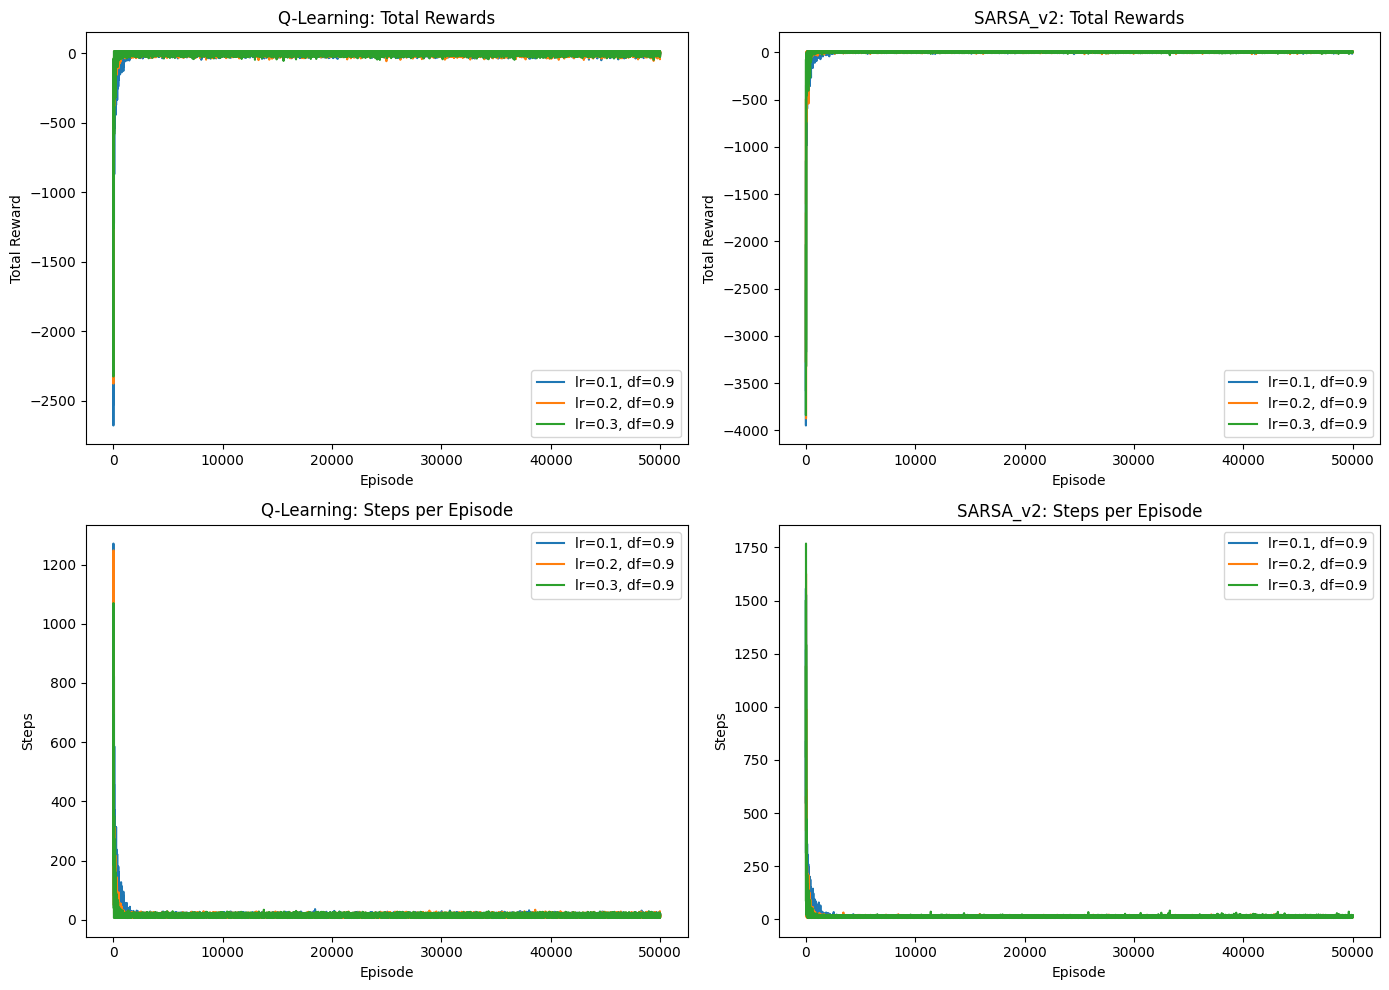

In [193]:
learning_rates = [0.1,0.2,0.3]
discount_factors = [0.9]
exploration_prob = 0.1
num_episodes = 50000

q_learning_results = {}
sarsa_v2_results = {}

def calculate_average(data):
    return np.mean(data)

for lr in learning_rates:
    for df in discount_factors:
        q_table_q_learning, rewards_q_learning, steps_q_learning = q_learning(lr, df, exploration_prob, num_episodes)
        q_learning_results[(lr, df)] = (rewards_q_learning, steps_q_learning)

        q_table_sarsa, rewards_sarsa, steps_sarsa = SARSA_v2(lr, df, exploration_prob, num_episodes)
        sarsa_v2_results[(lr, df)] = (rewards_sarsa, steps_sarsa)

for lr in learning_rates:
    for df in discount_factors:
        avg_q_learning_reward = calculate_average(q_learning_results[(lr, df)][0])
        avg_q_learning_steps = calculate_average(q_learning_results[(lr, df)][1])
        avg_sarsa_v2_reward = calculate_average(sarsa_v2_results[(lr, df)][0])
        avg_sarsa_v2_steps = calculate_average(sarsa_v2_results[(lr, df)][1])

        print(f"Q-Learning with learning_rate={lr}, discount_factor={df}: Average Total Reward: {avg_q_learning_reward}, Average Steps: {avg_q_learning_steps}")
        print(f"SARSA_v2 with learning_rate={lr}, discount_factor={df}: Average Total Reward: {avg_sarsa_v2_reward}, Average Steps: {avg_sarsa_v2_steps}")

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

for lr in learning_rates:
    for df in discount_factors:
        ax[0, 0].plot(q_learning_results[(lr, df)][0], label=f'lr={lr}, df={df}')
        ax[0, 0].set_title('Q-Learning: Total Rewards')
        ax[0, 0].set_xlabel('Episode')
        ax[0, 0].set_ylabel('Total Reward')

        ax[0, 1].plot(sarsa_v2_results[(lr, df)][0], label=f'lr={lr}, df={df}')
        ax[0, 1].set_title('SARSA_v2: Total Rewards')
        ax[0, 1].set_xlabel('Episode')
        ax[0, 1].set_ylabel('Total Reward')

        ax[1, 0].plot(q_learning_results[(lr, df)][1], label=f'lr={lr}, df={df}')
        ax[1, 0].set_title('Q-Learning: Steps per Episode')
        ax[1, 0].set_xlabel('Episode')
        ax[1, 0].set_ylabel('Steps')

        ax[1, 1].plot(sarsa_v2_results[(lr, df)][1], label=f'lr={lr}, df={df}')
        ax[1, 1].set_title('SARSA_v2: Steps per Episode')
        ax[1, 1].set_xlabel('Episode')
        ax[1, 1].set_ylabel('Steps')

for axes in ax.flat:
    axes.legend()

plt.tight_layout()
plt.show()

finally, i choose learning_rate=0.1, discount_factor=0.95 for both methods, since they have balanced performance, fast convergence and low volatility.
________________________________________________________________________________
________________________________________________________________________________
________________________________________________________________________________
________________________________________________________________________________
The following code is about saving qvalue and running test

In [199]:
import pandas as pd
import os

learning_rate = 0.1
discount_factor = 0.9
exploration_prob = 0.1
num_episodes = 50000

q_table_q_learning, rewards_q_learning, steps_q_learning = q_learning(learning_rate, discount_factor, exploration_prob, num_episodes)
np.savetxt('q_table_q_learning.csv', q_table_q_learning, delimiter=",")

q_table_sarsa_v2, rewards_sarsa_v2, steps_sarsa_v2 = SARSA_v2(learning_rate, discount_factor, exploration_prob, num_episodes)
np.savetxt('q_table_sarsa_v2.csv', q_table_sarsa_v2, delimiter=",")

# q_table_sarsa, rewards_sarsa, steps_sarsa = SARSA(learning_rate, discount_factor, exploration_prob, num_episodes)
# np.savetxt('q_table_sarsa.csv', q_table_sarsa, delimiter=",")

In [200]:
import pandas as pd
import os
import gym
import numpy as np
q_table_q_learning = np.loadtxt('q_table_q_learning.csv', delimiter=",")
q_table_sarsa_v2 = np.loadtxt('q_table_sarsa_v2.csv', delimiter=",")
q_table_sarsa = np.loadtxt('q_table_sarsa.csv', delimiter=",")

In [201]:
def run_sol(q_table, env_name="Taxi-v3", render_mode="ansi"):
    env = gym.make(env_name, render_mode=render_mode)
    env.reset(seed=42)
    state = env.reset()[0]
    total_reward = 0
    step_count = 0

    print("Initial State:")
    print(env.render())

    while step_count<21:
        action = np.argmax(q_table[state])
        next_state, reward, done, _, info = env.step(action)
        total_reward += reward
        state = next_state
        
        step_count += 1
        print(env.render())
        print(f"Reward: {reward}")
        
        if done:
            break

    print(f"Total Reward: {total_reward}")
    print(f"Total Step {step_count}:")

q_table_q_learning = np.loadtxt('q_table_q_learning.csv', delimiter=",")
q_table_sarsa_v2 = np.loadtxt('q_table_sarsa_v2.csv', delimiter=",")
print("Q-Learning:")
run_sol(q_table_q_learning)
print("---------------------------------------------")
print("---------------------------------------------")
print("\nSARSA_v2:")
run_sol(q_table_sarsa_v2)

Q-Learning Agent:
Initial State:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step 1:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Reward: -1
Step 2:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Reward: -1
Step 3:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Reward: -1
Step 4:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Reward: -1
Step 5:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Reward: -1
Step 6:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Reward: -1
Step 7:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)

Reward: -1
Step 8:
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+----

In [202]:
def calculate_performance(q_table, env_name="Taxi-v3", num_episodes=100, max_steps=100):
    env = gym.make(env_name, render_mode="ansi")
    total_episodes_rewards = []
    total_steps = []

    for episode in range(num_episodes):
        state = env.reset()[0]
        total_rewards = 0
        step_count = 0

        while step_count < max_steps:
            action = np.argmax(q_table[state])
            next_state, reward, done, _, info = env.step(action)
            total_rewards += reward
            state = next_state
            step_count += 1

            if done:
                break
        total_episodes_rewards.append(total_rewards)
        total_steps.append(step_count)
    avg_reward = np.mean(total_episodes_rewards)
    avg_steps = np.mean(total_steps)
    return avg_reward, avg_steps

In [214]:

avg_reward_q_learning, avg_steps_q_learning = calculate_performance(q_table_q_learning)
print(f"q_learning avg reward is {avg_reward_q_learning}, q_learning avg steps is {avg_steps_q_learning}")
avg_reward_sarsa_v2, avg_steps_sarsa_v2 = calculate_performance(q_table_sarsa_v2)
print(f"sarsa_v2 avg reward is {avg_reward_sarsa_v2}, sarsa_v2 avg steps is {avg_steps_sarsa_v2}")
# avg_reward_sarsa, avg_steps_sarsa = calculate_performance(q_table_sarsa)
# print(f"sarsa avg reward is {avg_reward_sarsa}, sarsa avg steps is {avg_steps_sarsa}")

q_learning avg reward is 7.94, q_learning avg steps is 13.06
sarsa_v2 avg reward is 7.56, sarsa_v2 avg steps is 13.44
